## Authors
1. Alejandro Esperón Couceiro 
2. Ayesha Munir

#### Initial Models

This project uses deep learning to classify Amazon reviews into positive or negative sentiment. The dataset contains reviews labeled as __label__1 (negative: 1-2 stars) and __label__2 (positive: 4-5 stars). We use several RNN-based models to predict the sentiment, and compare their accuracy.

We trained three initial models: **LSTM, GRU, and Bidirectional LSTM (BiLSTM)**.


In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import TextVectorization

In [2]:
#reads a file. Each line has the format: label text
#Returns a list with the text and a list with the labels
def readData(fname):

    with open(fname, 'r', encoding="utf-8") as f:
        fileData = f.read()
  
    lines = fileData.split("\n")
    textData = list()
    textLabel = list()
    lineLength = np.zeros(len(lines))
    
    for i, aLine in enumerate(lines):     
        if not aLine:
            break  
        label = aLine.split(" ")[0]
        lineLength[i] = len(aLine.split(" "))
        if(label == "__label__1"):
            textLabel.append(0)
            textData.append(aLine.removeprefix("__label__1 "))

        elif(label == "__label__2"):
            textLabel.append(1)
            textData.append(aLine.removeprefix("__label__2 "))

        else:
            print("\nError in readData: ", i, aLine)
            exit()
    
    f.close()
    return textData, textLabel, int(np.average(lineLength)+2*np.std(lineLength))

In [3]:
 def transformData(x_train, y_train, x_test, y_test, maxFeatures, seqLength):
     #transforms text input to int input based on the vocabulary
     #max_tokens = maxFeatures is the size of the vocabulary
     #output_sequence_length =  seqLength is the maximum length of the transformed text. Adds 0 is text length is shorter
     precLayer = TextVectorization(max_tokens = maxFeatures, 
     standardize =  'lower_and_strip_punctuation', split = 'whitespace', output_mode = 'int', 
     output_sequence_length =  seqLength) # removed layers.experimental.preprocessing.
     precLayer.adapt(x_train)
     #print(precLayer.get_vocabulary())
     x_train_int = precLayer(x_train)
     y_train = tf.convert_to_tensor(y_train)
     #print(x_train_int)
     #print(y_train)
     x_test_int= precLayer(x_test)
     y_test = tf.convert_to_tensor(y_test)
     #print(x_test_int)
     #print(y_test)

     return x_train_int, y_train, x_test_int, y_test

# Transforming Data 
#def transformData(x_train, y_train, x_test, y_test, maxFeatures, seqLength):
#    precLayer = TextVectorization(
#        max_tokens=maxFeatures,
#        standardize='lower_and_strip_punctuation',
#        split='whitespace',
#        output_mode='int',
#        output_sequence_length=seqLength
#    )
#    precLayer.adapt(x_train)
#
#    x_train_int = precLayer(x_train)
#    y_train = tf.convert_to_tensor(y_train)
#
#    x_test_int = precLayer(x_test)
#    y_test = tf.convert_to_tensor(y_test)
#
#    return x_train_int, y_train, x_test_int, y_test, precLayer

In [4]:
# Loading data
maxFeatures = 10000
embedding_dim = 128

x_train, y_train, seqLength = readData("amazon/train_small.txt")
x_test, y_test, _ = readData("amazon/test_small.txt")

x_train_int, y_train, x_test_int, y_test = transformData(
    x_train, y_train, x_test, y_test, maxFeatures, seqLength
)

print("Data loaded and transformed successfully.")




Data loaded and transformed successfully.


In [5]:
from models import lstm_model, gru_model, bidirectional_lstm_model

In [13]:
# Create and train LSTM
lstm = lstm_model(maxFeatures, seqLength, embedding_dim)
history_lstm = lstm.fit(x_train_int, y_train, epochs=5, batch_size=128, validation_split=0.2)

# Create and train GRU
gru = gru_model(maxFeatures, seqLength, embedding_dim)
history_gru = gru.fit(x_train_int, y_train, epochs=5, batch_size=128, validation_split=0.2)

# Create and train Bidirectional LSTM
bilstm = bidirectional_lstm_model(maxFeatures, seqLength, embedding_dim)
history_bilstm = bilstm.fit(x_train_int, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 48s 283ms/step - accuracy: 0.5175 - loss: 0.6935 - val_accuracy: 0.4758 - val_loss: 0.6936
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 281ms/step - accuracy: 0.5195 - loss: 0.6928 - val_accuracy: 0.5248 - val_loss: 0.6924
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 251ms/step - accuracy: 0.5244 - loss: 0.6904 - val_accuracy: 0.5272 - val_loss: 0.6942
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 266ms/step - accuracy: 0.5220 - loss: 0.6795 - val_accuracy: 0.4760 - val_loss: 0.7062
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 270ms/step - accuracy: 0.5280 - loss: 0.6732 - val_accuracy: 0.5282 - val_loss: 0.7028
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 275ms/step - accuracy: 0.5140 - loss: 0.6931 - val_accuracy: 0.5250 - val_loss: 0.6921
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 278ms/step - accuracy: 0.5212 - loss: 0.6929 - val_accuracy: 0.5246 - val_loss: 0.6920
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 278ms/step - accuracy: 0.5232 - loss: 0.6911 - 

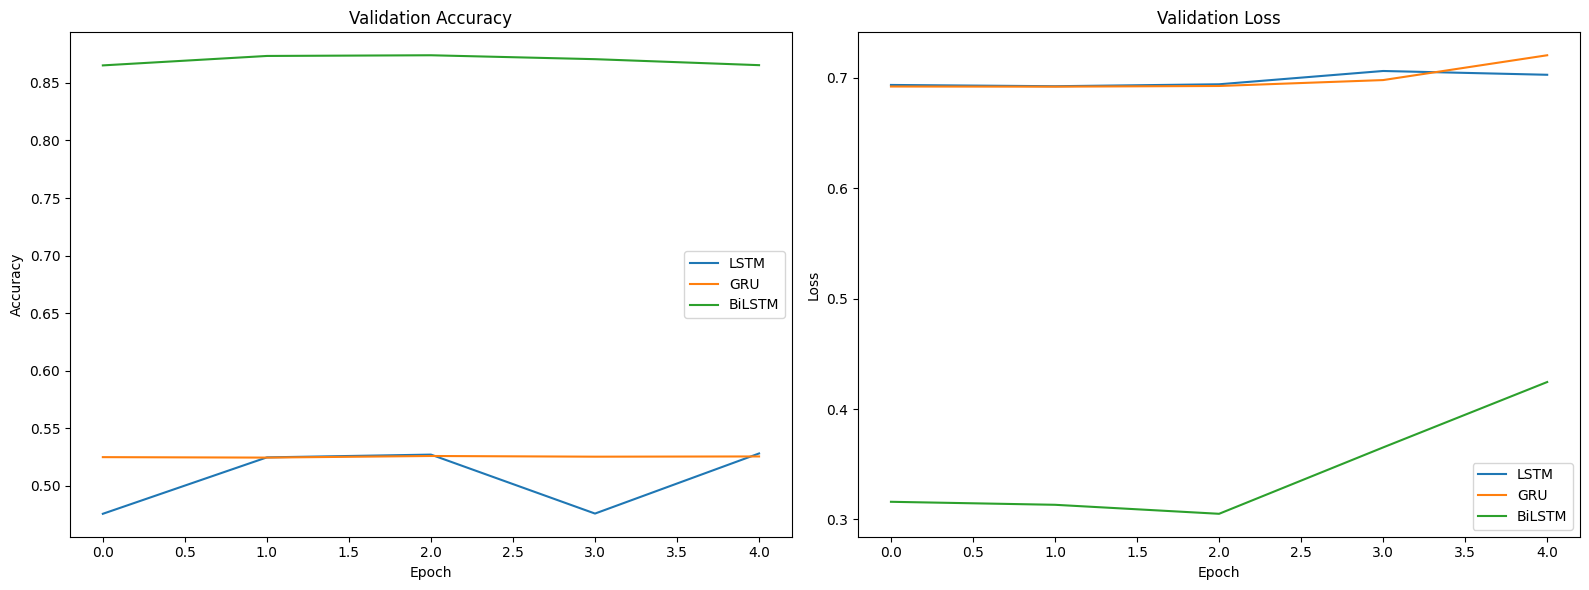

In [14]:
import matplotlib.pyplot as plt

def plot_histories(histories, labels):
    plt.figure(figsize=(16, 6))

    # Accuracy comparison
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_accuracy'], label=f'{label}')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss comparison
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_loss'], label=f'{label}')
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_histories(
    [history_lstm, history_gru, history_bilstm],
    ['LSTM', 'GRU', 'BiLSTM']
)


In [15]:
acc_lstm = lstm.evaluate(x_test_int, y_test)[1]
acc_gru = gru.evaluate(x_test_int, y_test)[1]
acc_bilstm = bilstm.evaluate(x_test_int, y_test)[1]

print(f"LSTM Test Accuracy: {acc_lstm*100:.2f}%")
print(f"GRU Test Accuracy: {acc_gru*100:.2f}%")
print(f"BiLSTM Test Accuracy: {acc_bilstm*100:.2f}%")


782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.5165 - loss: 0.6999
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.5162 - loss: 0.7184
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.8725 - loss: 0.4121
LSTM Test Accuracy: 51.97%
GRU Test Accuracy: 51.94%
BiLSTM Test Accuracy: 86.96%


#### Comparison
LSTM and GRU models performed poorly, around 52% accuracy, which is close to guessing. The Bidirectional LSTM model, on the other hand, performed much better with about 87% accuracy. This is because BiLSTM can read the text in both directions, understanding better context, which helps improve the prediction.

| Model              | Accuracy (%) | Notes |
|-------------------|--------------|-------|
| LSTM              | 51.97        | Poor results, underfitting |
| GRU               | 51.94        | Same as LSTM |
| BiLSTM            | 86.96        | Strong performance |

Additionally, we can see that in every model validation loss gets worse in last epochs, while training loss and acccuracy keeps improving. As this could be due to overfitting we decided to try to avoid it by implementing dropout and recurrent_dropout parameters in the model with biggest validation loss increse (BiLSTM).

In [7]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout, Bidirectional

model = Sequential([
        Embedding(maxFeatures, embedding_dim, input_length=seqLength),
        Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\Administrator\miniconda3\envs\DL\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [8]:
history_bilstm = model.fit(x_train_int, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 116s 706ms/step - accuracy: 0.6983 - loss: 0.5554 - val_accuracy: 0.8602 - val_loss: 0.3179
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 108s 690ms/step - accuracy: 0.9020 - loss: 0.2543 - val_accuracy: 0.8688 - val_loss: 0.3066
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 110s 699ms/step - accuracy: 0.9306 - loss: 0.1897 - val_accuracy: 0.8668 - val_loss: 0.3451
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 108s 689ms/step - accuracy: 0.9382 - loss: 0.1708 - val_accuracy: 0.8608 - val_loss: 0.3455
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 112s 711ms/step - accuracy: 0.9535 - loss: 0.1367 - val_accuracy: 0.8638 - val_loss: 0.4029


In [9]:
acc_model = model.evaluate(x_test_int, y_test)[1]

print(f"Model Test Accuracy: {acc_model*100:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.8661 - loss: 0.3890
Model Test Accuracy: 86.43%


Even with this technique the results are similar.

#### Advanced models
To improve further, we added four more models:
- **BiGRU**, which is like BiLSTM but uses GRU instead. It got 85% accuracy and trained faster.
- **Stacked BiLSTM**, which uses two BiLSTM layers. It slightly overfitted, but accuracy stayed around 85%.
- **CNN + BiLSTM**, which combines convolutional layers for local patterns with BiLSTM for full context. This model got the best results with about 88% accuracy.
- **Transformer Block**, which uses attention instead of RNN. It got 84% accuracy. It's fast and strong but may need tuning to beat BiLSTM.


In [16]:
from models import stacked_bilstm_model, cnn_bilstm_model, transformer_block_model, bidirectional_gru_model

model_defs = [
    ("BiGRU", bidirectional_gru_model),
    ("Stacked BiLSTM", stacked_bilstm_model),
    ("CNN + BiLSTM", cnn_bilstm_model),
    ("Transformer Block", transformer_block_model)
]

trained_models = []
histories = []
labels = []

for name, model_fn in model_defs:
    print(f"\nTraining {name}...")
    model = model_fn(maxFeatures, seqLength, embedding_dim)
    history = model.fit(
        x_train_int, y_train,
        epochs=5,
        batch_size=128,
        validation_split=0.2,
        verbose=2
    )
    trained_models.append((name, model))
    histories.append(history)
    labels.append(name)



Training BiGRU...
Epoch 1/5
157/157 - 35s - 226ms/step - accuracy: 0.7832 - loss: 0.4478 - val_accuracy: 0.8414 - val_loss: 0.3518
Epoch 2/5
157/157 - 37s - 236ms/step - accuracy: 0.9008 - loss: 0.2466 - val_accuracy: 0.8480 - val_loss: 0.3514
Epoch 3/5
157/157 - 36s - 228ms/step - accuracy: 0.9306 - loss: 0.1886 - val_accuracy: 0.8534 - val_loss: 0.3699
Epoch 4/5
157/157 - 34s - 215ms/step - accuracy: 0.9506 - loss: 0.1405 - val_accuracy: 0.8422 - val_loss: 0.4211
Epoch 5/5
157/157 - 34s - 215ms/step - accuracy: 0.9632 - loss: 0.1083 - val_accuracy: 0.8412 - val_loss: 0.4279

Training Stacked BiLSTM...
Epoch 1/5
157/157 - 181s - 1s/step - accuracy: 0.8051 - loss: 0.4159 - val_accuracy: 0.8634 - val_loss: 0.3295
Epoch 2/5
157/157 - 183s - 1s/step - accuracy: 0.9193 - loss: 0.2152 - val_accuracy: 0.8660 - val_loss: 0.3047
Epoch 3/5
157/157 - 190s - 1s/step - accuracy: 0.9495 - loss: 0.1450 - val_accuracy: 0.8668 - val_loss: 0.3448
Epoch 4/5
157/157 - 192s - 1s/step - accuracy: 0.9664 -

In [17]:
# Evaluation of trained models
for name, model in trained_models:
    loss, acc = model.evaluate(x_test_int, y_test, verbose=0)
    print(f"{name} Test Accuracy: {acc * 100:.2f}%")


BiGRU Test Accuracy: 84.98%
Stacked BiLSTM Test Accuracy: 86.03%
CNN + BiLSTM Test Accuracy: 87.77%
Transformer Block Test Accuracy: 85.06%


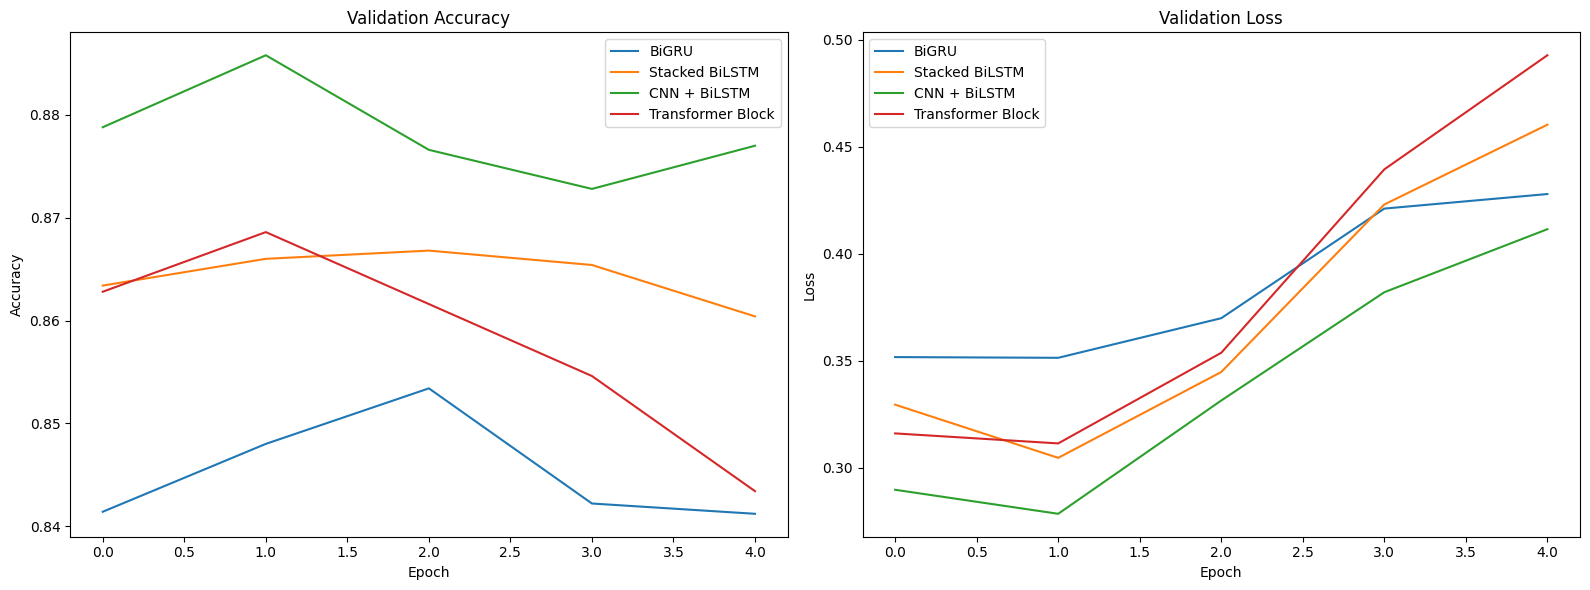

In [19]:
plot_histories(histories, labels)

#### Justification for Evaluation

We used accuracy to compare the models. Since the dataset is balanced (equal positive and negative reviews), accuracy is a good metric. We trained for 5 epochs and also looked at validation accuracy to avoid overfitting.

The BiLSTM-based models clearly performed better than simple RNNs like LSTM and GRU. Adding CNN or stacking layers made the models even stronger. The Transformer model showed good performance and could be improved further with more tuning or pre-trained embeddings.

#### Comparison

| Model              | Accuracy (%) | Notes |
|-------------------|--------------|-------|
| LSTM              | 51.97        | Poor results, underfitting |
| GRU               | 51.94        | Same as LSTM |
| BiLSTM            | 86.96        | Strong performance |
| BiGRU             | 84.98        | Good and faster |
| Stacked BiLSTM    | 86.03        | Slight overfitting |
| CNN + BiLSTM      | 87.77        | **Best performance** |
| Transformer Block | 85.06        | Promising |

#### Conclusion

In this case The best model was CNN + BiLSTM. It gave the highest accuracy by combining local and global features. BiLSTM also worked very well. The Transformer block was also strong and could be improved further. Simple RNNs like LSTM and GRU did not perform well in this task. Overall, using bidirectional layers or hybrid models gave the best results.


#### Changing embedding_dim, seqLength and maxFeatures parameters

In this part of the project, we experimented with changing key hyperparameters such as:

- `maxFeatures`: number of words in the vocabulary
- `embedding_dim`: size of word vector representation
- `seqLength`: fixed length for each input sequence

Initially, we were using `maxFeatures = 10000` and `embedding_dim = 128`. However, after analyzing word frequency in Analisys.ipynb, we noticed that most words were rare and might introduce noise. This could lead to overfitting, especially with large vocabulary sizes.

To reduce overfitting and make the model learn more general patterns, we decided to:

- Lower `maxFeatures` to 3000 and later to 500.
- Cut `embedding_dim` in half to 64.
- Keep `seqLength` as-is since it was calculated from average review length.



In [20]:
maxFeatures = 3000 
embedding_dim = 64

x_train, y_train, _ = readData("amazon/train_small.txt")
x_test, y_test, _ = readData("amazon/test_small.txt")

x_train_int, y_train, x_test_int, y_test = transformData(
    x_train, y_train, x_test, y_test, maxFeatures, seqLength
)


In [21]:
# Create and train LSTM
lstm = lstm_model(maxFeatures, seqLength, embedding_dim)
history_lstm = lstm.fit(x_train_int, y_train, epochs=5, batch_size=128, validation_split=0.2)

# Create and train GRU
gru = gru_model(maxFeatures, seqLength, embedding_dim)
history_gru = gru.fit(x_train_int, y_train, epochs=5, batch_size=128, validation_split=0.2)

# Create and train Bidirectional LSTM
bilstm = bidirectional_lstm_model(maxFeatures, seqLength, embedding_dim)
history_bilstm = bilstm.fit(x_train_int, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
157/157 [==============================] - 23s 133ms/step - loss: 0.6932 - accuracy: 0.5107 - val_loss: 0.6920 - val_accuracy: 0.5268
Epoch 2/5
157/157 [==============================] - 22s 143ms/step - loss: 0.6926 - accuracy: 0.5178 - val_loss: 0.6917 - val_accuracy: 0.5254
Epoch 3/5
157/157 [==============================] - 21s 135ms/step - loss: 0.7032 - accuracy: 0.5188 - val_loss: 0.6920 - val_accuracy: 0.5248
Epoch 4/5
157/157 [==============================] - 21s 135ms/step - loss: 0.6907 - accuracy: 0.5192 - val_loss: 0.6929 - val_accuracy: 0.5280
Epoch 5/5
157/157 [==============================] - 21s 134ms/step - loss: 0.6807 - accuracy: 0.5644 - val_loss: 0.6845 - val_accuracy: 0.5412
Epoch 1/5
157/157 [==============================] - 52s 306ms/step - loss: 0.6931 - accuracy: 0.5097 - val_loss: 0.6933 - val_accuracy: 0.4754
Epoch 2/5
157/157 [==============================] - 47s 301ms/step - loss: 0.6928 - accuracy: 0.5107 - val_loss: 0.6923 - val_accuracy:

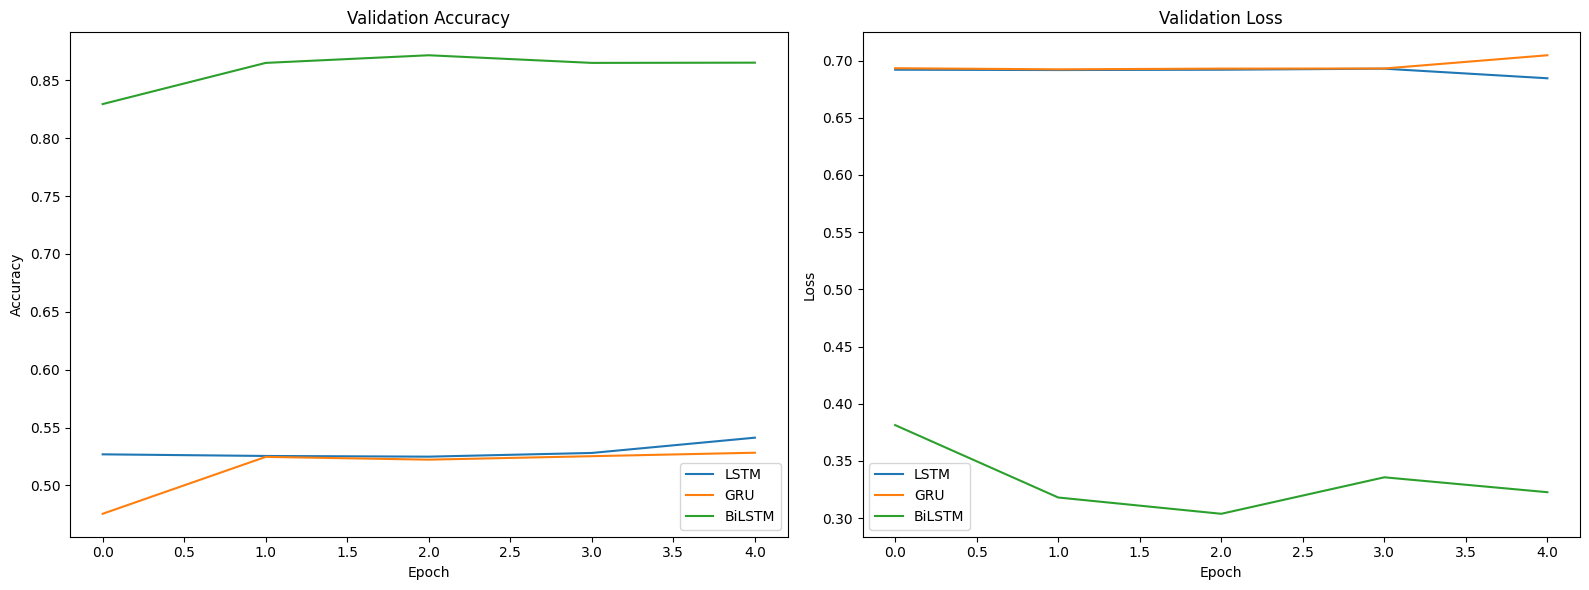

In [22]:
import matplotlib.pyplot as plt

def plot_histories(histories, labels):
    plt.figure(figsize=(16, 6))

    # Accuracy comparison
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_accuracy'], label=f'{label}')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss comparison
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_loss'], label=f'{label}')
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_histories(
    [history_lstm, history_gru, history_bilstm],
    ['LSTM', 'GRU', 'BiLSTM']
)


In [23]:
acc_lstm = lstm.evaluate(x_test_int, y_test)[1]
acc_gru = gru.evaluate(x_test_int, y_test)[1]
acc_bilstm = bilstm.evaluate(x_test_int, y_test)[1]

print(f"LSTM Test Accuracy: {acc_lstm*100:.2f}%")
print(f"GRU Test Accuracy: {acc_gru*100:.2f}%")
print(f"BiLSTM Test Accuracy: {acc_bilstm*100:.2f}%")

782/782 [==============================] - 46s 59ms/step - loss: 0.3163 - accuracy: 0.8762
LSTM Test Accuracy: 53.26%
GRU Test Accuracy: 52.31%
BiLSTM Test Accuracy: 87.62%


As we can see results are better now, with a better progression in validation loss.

We decided to reduce words used even further to see if models perform better with a very low number of values.

In [24]:
maxFeatures = 500
embedding_dim = 64

x_train, y_train, _ = readData("amazon/train_small.txt")
x_test, y_test, _ = readData("amazon/test_small.txt")

x_train_int, y_train, x_test_int, y_test = transformData(
    x_train, y_train, x_test, y_test, maxFeatures, seqLength
)


In [25]:
# Create and train LSTM
lstm = lstm_model(maxFeatures, seqLength, embedding_dim)
history_lstm = lstm.fit(x_train_int, y_train, epochs=5, batch_size=128, validation_split=0.2)

# Create and train GRU
gru = gru_model(maxFeatures, seqLength, embedding_dim)
history_gru = gru.fit(x_train_int, y_train, epochs=5, batch_size=128, validation_split=0.2)

# Create and train Bidirectional LSTM
bilstm = bidirectional_lstm_model(maxFeatures, seqLength, embedding_dim)
history_bilstm = bilstm.fit(x_train_int, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5
157/157 [==============================] - 38s 229ms/step - loss: 0.6929 - accuracy: 0.5107 - val_loss: 0.6921 - val_accuracy: 0.5248
Epoch 2/5
157/157 [==============================] - 35s 224ms/step - loss: 0.6927 - accuracy: 0.5159 - val_loss: 0.6920 - val_accuracy: 0.5246
Epoch 3/5
157/157 [==============================] - 35s 221ms/step - loss: 0.6922 - accuracy: 0.5205 - val_loss: 0.6922 - val_accuracy: 0.5262
Epoch 4/5
157/157 [==============================] - 35s 222ms/step - loss: 0.6901 - accuracy: 0.5232 - val_loss: 0.6805 - val_accuracy: 0.5890
Epoch 5/5
157/157 [==============================] - 35s 221ms/step - loss: 0.6933 - accuracy: 0.5232 - val_loss: 0.6911 - val_accuracy: 0.5296
Epoch 1/5
157/157 [==============================] - 60s 362ms/step - loss: 0.6931 - accuracy: 0.5074 - val_loss: 0.6931 - val_accuracy: 0.5238
Epoch 2/5
157/157 [==============================] - 59s 375ms/step - loss: 0.6928 - accuracy: 0.5138 - val_loss: 0.6936 - val_accuracy:

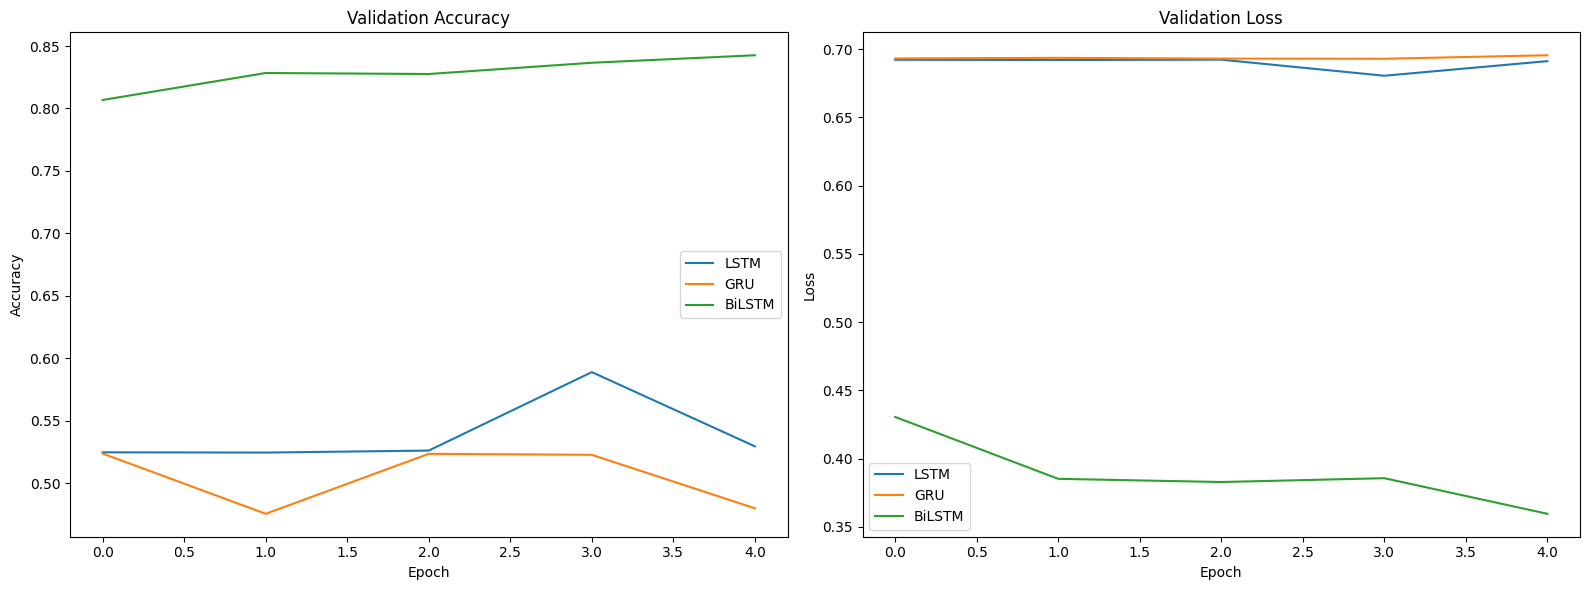

In [26]:
import matplotlib.pyplot as plt

def plot_histories(histories, labels):
    plt.figure(figsize=(16, 6))

    # Accuracy comparison
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_accuracy'], label=f'{label}')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss comparison
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_loss'], label=f'{label}')
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_histories(
    [history_lstm, history_gru, history_bilstm],
    ['LSTM', 'GRU', 'BiLSTM']
)


In [27]:
acc_lstm = lstm.evaluate(x_test_int, y_test)[1]
acc_gru = gru.evaluate(x_test_int, y_test)[1]
acc_bilstm = bilstm.evaluate(x_test_int, y_test)[1]

print(f"LSTM Test Accuracy: {acc_lstm*100:.2f}%")
print(f"GRU Test Accuracy: {acc_gru*100:.2f}%")
print(f"BiLSTM Test Accuracy: {acc_bilstm*100:.2f}%")

782/782 [==============================] - 51s 66ms/step - loss: 0.3472 - accuracy: 0.8468
LSTM Test Accuracy: 52.13%
GRU Test Accuracy: 48.89%
BiLSTM Test Accuracy: 84.68%


As we can see now, it has a better progression in validation loss, but overall performance is worse.
We will use the better combination to compare results with all the advanced models.


#### Results After Changing Parameters

| Model   | maxFeatures | embedding_dim | Test Accuracy (%) |
|---------|-------------|----------------|--------------------|
| LSTM    | 3000        | 64             | 53.26              |
| GRU     | 3000        | 64             | 52.31              |
| BiLSTM  | 3000        | 64             | **87.62**          |
| LSTM    | 500         | 64             | 52.13              |
| GRU     | 500         | 64             | 48.89              |
| BiLSTM  | 500         | 64             | 84.68              |

Even with fewer words and smaller embeddings, **BiLSTM consistently performed best**, confirming it learns important context in both directions. LSTM and GRU struggled to generalize, especially with such limited vocabulary (500 words).

In [28]:
maxFeatures = 3000 
embedding_dim = 64

x_train, y_train, _ = readData("amazon/train_small.txt")
x_test, y_test, _ = readData("amazon/test_small.txt")

x_train_int, y_train, x_test_int, y_test = transformData(
    x_train, y_train, x_test, y_test, maxFeatures, seqLength
)


In [29]:
from models import stacked_bilstm_model, cnn_bilstm_model, transformer_block_model, bidirectional_gru_model

model_defs = [
    ("BiGRU", bidirectional_gru_model),
    ("Stacked BiLSTM", stacked_bilstm_model),
    ("CNN + BiLSTM", cnn_bilstm_model),
    ("Transformer Block", transformer_block_model)
]

trained_models = []
histories = []
labels = []

for name, model_fn in model_defs:
    print(f"\nTraining {name}...")
    model = model_fn(maxFeatures, seqLength, embedding_dim)
    history = model.fit(
        x_train_int, y_train,
        epochs=5,
        batch_size=128,
        validation_split=0.2,
        verbose=2
    )
    trained_models.append((name, model))
    histories.append(history)
    labels.append(name)



Training BiGRU...
Epoch 1/5
157/157 - 137s - loss: 0.4906 - accuracy: 0.7556 - val_loss: 0.3701 - val_accuracy: 0.8326 - 137s/epoch - 875ms/step
Epoch 2/5
157/157 - 135s - loss: 0.2826 - accuracy: 0.8845 - val_loss: 0.3194 - val_accuracy: 0.8602 - 135s/epoch - 858ms/step
Epoch 3/5
157/157 - 130s - loss: 0.2318 - accuracy: 0.9114 - val_loss: 0.3252 - val_accuracy: 0.8644 - 130s/epoch - 828ms/step
Epoch 4/5
157/157 - 126s - loss: 0.2151 - accuracy: 0.9181 - val_loss: 0.3215 - val_accuracy: 0.8638 - 126s/epoch - 805ms/step
Epoch 5/5
157/157 - 126s - loss: 0.2005 - accuracy: 0.9238 - val_loss: 0.3352 - val_accuracy: 0.8686 - 126s/epoch - 803ms/step

Training Stacked BiLSTM...
Epoch 1/5
157/157 - 305s - loss: 0.4280 - accuracy: 0.7875 - val_loss: 0.3291 - val_accuracy: 0.8590 - 305s/epoch - 2s/step
Epoch 2/5
157/157 - 292s - loss: 0.2563 - accuracy: 0.8998 - val_loss: 0.3280 - val_accuracy: 0.8622 - 292s/epoch - 2s/step
Epoch 3/5
157/157 - 301s - loss: 0.2088 - accuracy: 0.9214 - val_loss:

In [30]:
# Evaluation of trained models
for name, model in trained_models:
    loss, acc = model.evaluate(x_test_int, y_test, verbose=0)
    print(f"{name} Test Accuracy: {acc * 100:.2f}%")


BiGRU Test Accuracy: 87.60%
Stacked BiLSTM Test Accuracy: 87.00%
CNN + BiLSTM Test Accuracy: 87.96%
Transformer Block Test Accuracy: 85.33%


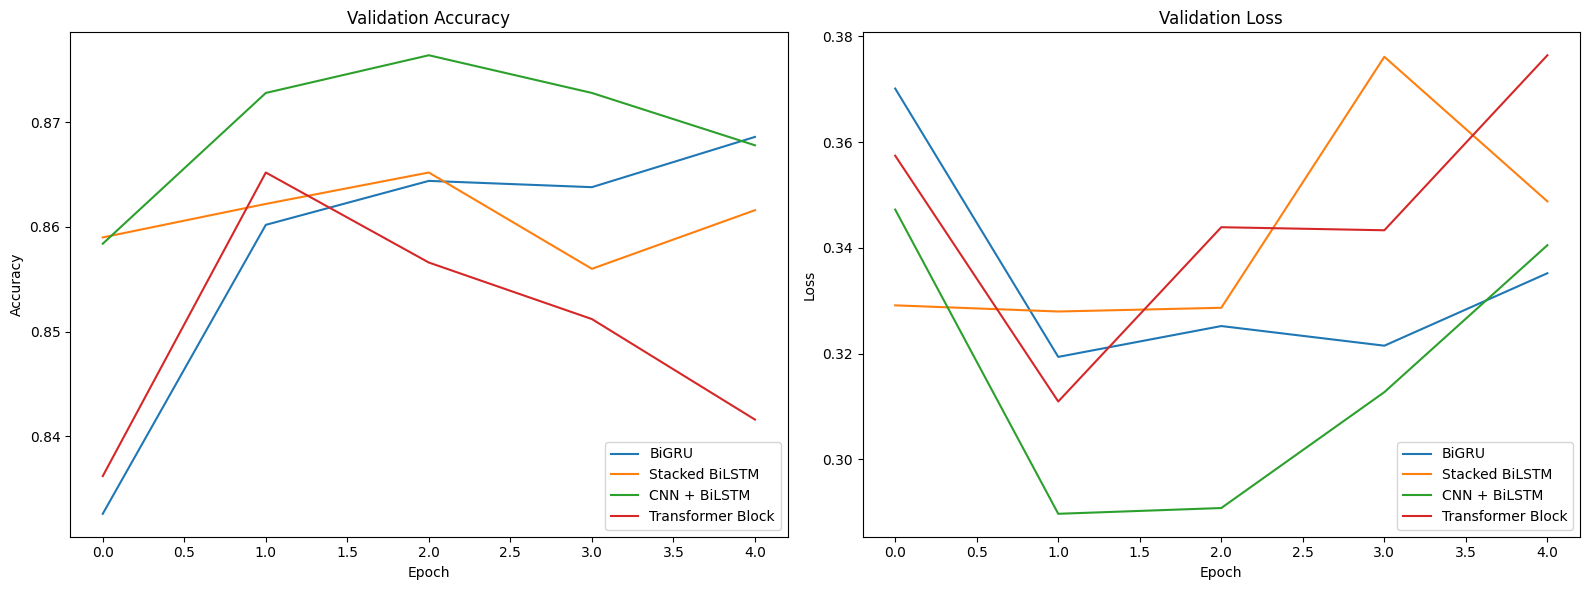

In [31]:
plot_histories(histories, labels)

#### Final Advanced Models with Best Parameters

After tuning, we applied the best hyperparameter combo (`maxFeatures = 3000`, `embedding_dim = 64`) to advanced models. These gave us the highest performance.

| Model              | Test Accuracy (%) | Notes |
|--------------------|-------------------|-------|
| CNN + BiLSTM       | **87.96**         | Best performer, combines local and global features |
| BiGRU              | 87.60             | Fast and accurate |
| Stacked BiLSTM     | 87.00             | Deep context, slightly overfits |
| Transformer Block  | 85.33             | Modern, strong, needs tuning |

#### Final Thoughts

The combination of CNN and BiLSTM gave the **highest accuracy**. BiGRU and Stacked BiLSTM also performed well. The Transformer model showed promise but did not outperform BiLSTM-based models in this case.

Lowering the vocabulary size helped reduce overfitting and improved generalization. However, reducing it too much (e.g., to 500) hurt the performance of simpler models. So, for our final setup, using a **mid-sized vocabulary (3000)** and **BiLSTM variants** gave the best balance between performance and generalization.